# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))

197625


## Rename all the columns to lower case

In [3]:
df.columns = [x.lower() for x in df.columns]

## Change the Index to be the Line Names

In [4]:
df = df.set_index('linename')

## Painstakingly change the index back

In [5]:
df = df.reset_index()

## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order

In [6]:
def station_count(text):
    station = len(text)
    return station
df['Num_lines'] = df.linename.map(station_count)

## Write a function to clean a column name

In [7]:
def clean(col_name):
    cleaned = col_name.title()
    return cleaned

In [8]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [9]:
#Checking the output, we can see the results.
df.head(20)

,Linename,C/A,Unit,Scp,Station,Division,Date,Time,Desc,Entries,Exits,Num_Lines
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,7
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,7
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,7
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,7
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,7
5,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,20:00:00,REGULAR,6736562,2283425,7
6,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,00:00:00,REGULAR,6736683,2283460,7
7,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,04:00:00,REGULAR,6736696,2283461,7
8,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,08:00:00,REGULAR,6736705,2283483,7
9,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,12:00:00,REGULAR,6736746,2283524,7


## Compare subway traffic by day of the week. Display this as a graph.

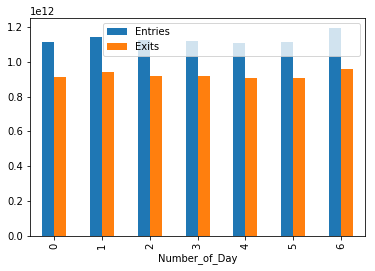

In [10]:
df.Date = pd.to_datetime(df.Date)
df['Number_of_Day'] = df.Date.dt.dayofweek
df = df.drop('Num_Lines', axis = 1)
grouped_set = df.groupby('Number_of_Day').sum()
grouped_set.plot.bar()

In [11]:
grouped_set.head(7)

,Entries,Exits
Number_of_Day,,
0,1114237052454,911938153513
1,1143313287046,942230721477
2,1123655222441,920630864687
3,1122723988662,920691927110
4,1110224700078,906799065337
5,1115661545514,909142081474
6,1192306179082,959223750461


## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes

In [12]:
weekday = [0,1,2,3,4]
def week_day(text):
    for x in text:
        if x == 0 or x == 1:
            return 1
        else:
            return 0
grouped_set['Weekday1'] = grouped_set.Number_of_Day.map(week_day)
grouped_set.head(7) 

AttributeError: 'DataFrame' object has no attribute 'Number_of_Day'

## Drop a couple of columns

In [ ]:
# Your code here

## Summary

Great! You practiced your data cleanup-skills using Pandas.